<a href="https://colab.research.google.com/github/sanyamjain789523/personalProjects/blob/main/fuzzyC_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# clusters = [[1,1,1],[5,5,5],[3,10,10]]
# X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [ ]:
dataPositif = pd.read_csv("/data positif.csv", sep = ";")
print(dataPositif.shape)
dataNetral = pd.read_csv("/data netral.csv", sep = ";")
print(dataNetral.shape)
dataNegatif = pd.read_csv("/data negatif.csv", sep = ";")
print(dataNegatif.shape)

df = pd.concat([dataPositif,dataNetral,dataNegatif])
df.head()

(714, 2)
(703, 2)
(700, 2)


,Text,Sentiment
0,masyarakat mudah pelayanan mata fasilitas kese...,Positif
1,bpjs kesehatan ketenagakerjaan manfaatnya bagus,Positif
2,alhamdulillah bpjs kesehatan bener membantu wa...,Positif
3,bpjs iurannya dibandingkan premi asuransi kese...,Positif
4,naiknya iuran org berpenghasilan minim bpjs su...,Positif


In [ ]:
df.shape

(2117, 2)

In [ ]:
# new_str = re.sub('[^a-zA-Z0-9}{:"",\n\.]', ' ', string)
cleanedStringL = []
for string in df.Text.to_list():
  new_str = re.sub('[^a-zA-Z]', ' ', string)
  cleanedStringL.append(new_str)

In [ ]:
df["cleanedString"] = cleanedStringL

In [ ]:
# vocab = {}
# count = 0
# for item in dataPositif["cleanedString"].to_list():
#   for word in item.split():
#     if word not in list(vocab.keys()):
#         vocab[word] = count
#         count+=1

In [ ]:
# len(vocab.keys())

In [ ]:
# np.array([[1, 2], [3, 4]]) 

In [ ]:
# inpArray = []
# for item in dataPositif["cleanedString"].to_list():
#   l = []
#   for word in item.split():
#     l.append(vocab[word])
#   inpArray.append(l)

In [ ]:
# np.asarray(inpArray)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=40, max_df=0.4, max_features=20000, ngram_range=(1,1),use_idf=False,norm=None)
tfidf = tfidf_vect.fit_transform(df['cleanedString'].values.astype("U"))
tfidf.shape

(2117, 77)

In [ ]:
tfidf.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.decomposition import PCA
X = tfidf.toarray()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [ ]:
principalComponents

array([[-0.11027254, -0.02317874, -0.28702374],
       [-0.18684622,  0.15402377, -0.38181544],
       [-0.09314758,  0.11781538, -0.30450904],
       ...,
       [ 0.19849306,  0.27351466, -0.79717956],
       [ 0.54837578,  0.36284587, -0.71873572],
       [ 0.77582003, -0.0655041 ,  0.36997377]])

In [ ]:
X = tfidf.toarray()

ms = MeanShift()
ms.fit(principalComponents)
labels = ms.labels_
print(labels)
clusterCentres = ms.cluster_centers_
print(clusterCentres)
n_clusters_ = len(np.unique(labels))
print("number of estimated clusters: ",n_clusters_)

[0 0 0 ... 0 0 0]
[[-0.11919634  0.08870654 -0.34545401]
 [-0.99118815  1.17887101  0.92528408]
 [-1.32840185  1.7762527   1.44509833]
 [ 1.58791681 -1.00362297  1.66833722]
 [ 0.06391971  1.10895351  1.47571909]
 [ 3.10954154  0.24212682  1.13437244]
 [-0.74657771 -0.83897825  1.35660029]]
number of estimated clusters:  7


In [ ]:
len(labels),len(df.Text.values)

(2117, 2117)

In [ ]:
pd.set_option("display.max_rows",500)

df["labels1"] = labels
dfF = df[['Text',"labels1"]]
dfF.head(200)

,Text,labels1
0,masyarakat mudah pelayanan mata fasilitas kese...,0
1,bpjs kesehatan ketenagakerjaan manfaatnya bagus,0
2,alhamdulillah bpjs kesehatan bener membantu wa...,0
3,bpjs iurannya dibandingkan premi asuransi kese...,0
4,naiknya iuran org berpenghasilan minim bpjs su...,0
5,bermanfaat berkat jkn kis peserta bpjs kesehat...,6
6,terimakasih bpjs karna menanggung pengobatan b...,0
7,jkn kis harisomawati salah peserta bpjs keseha...,6
8,salah fasilitas bpjs kesehatan menjalani cuci ...,0
9,harisomawari salah peserta jkn kis lancar menj...,6


In [ ]:
# print("Number of clusters obtained after clustering: ",len(dfF.labels.value_counts()),"\n Number of clusters obtained after dimesnsionality resduction and clustering: ",len(dfF.labels1.value_counts()))

In [ ]:
# dfF.labels.value_counts(), len(dfF.labels.value_counts())

In [ ]:
# dfF.labels1.value_counts()

In [ ]:
# colors = 10*['r','g','b']
# fig = plt.figure()
# ax = fig.add_subplot(111,projection = '3d')

# for i in range(len(X)):
#   ax.scatter(clusterCentres[i][0],clusterCentres[i][0],clusterCentres[i][0],c = colors[labels[i]])

# ax.scatter(clusterCentres[:,0],clusterCentres[:,1],clusterCentres[:,2],marker = 'x',color = 'k',
#             s = 150, linewidths = 5, zorder = 10)

# plt.show()

In [ ]:
!pip install fuzzy-c-means

In [ ]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
X = tfidf.toarray()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [ ]:
fcm = FCM(n_clusters=3)
fcm.fit(principalComponents)

In [ ]:
# len(principalComponents)

In [ ]:
# len(fcm.u.argmax(axis=1))

In [ ]:
# labelsFuz = list(fcm.u.argmax(axis=1))
# df["labelsFuz"] = labelsFuz
# dfFuz = df[['Text','labelsFuz']]
# dfFuz

In [ ]:
# dfFuz.labelsFuz.value_counts()

In [ ]:

# # outputs
# fcm_centers = fcm.centers
# fcm_labels = fcm.predict(principalComponents)

# # plot result
# f, axes = plt.subplots(1, 2, figsize=(11,5))
# axes[0].scatter(X[:,0], X[:,1], alpha=.1)
# axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
# axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
# plt.show()

In [ ]:
# fcm = FCM(n_clusters=3)
# fcm.fit(principalComponents)

In [ ]:
# len(principalComponents)

In [ ]:
# len(fcm.u.argmax(axis=1))

In [ ]:
# X[0]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5559843455596836
For n_clusters = 3 The average silhouette_score is : 0.5559843455596836
For n_clusters = 4 The average silhouette_score is : 0.5559843455596836
For n_clusters = 5 The average silhouette_score is : 0.5559843455596836


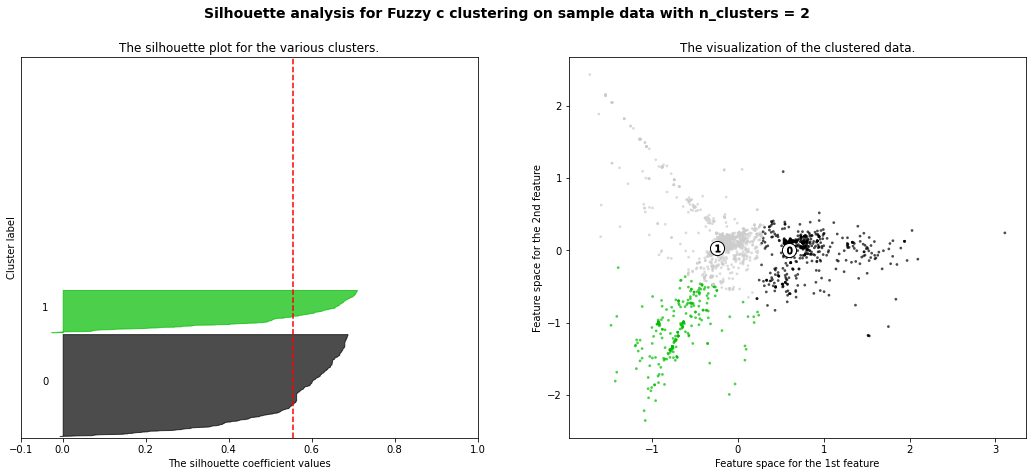

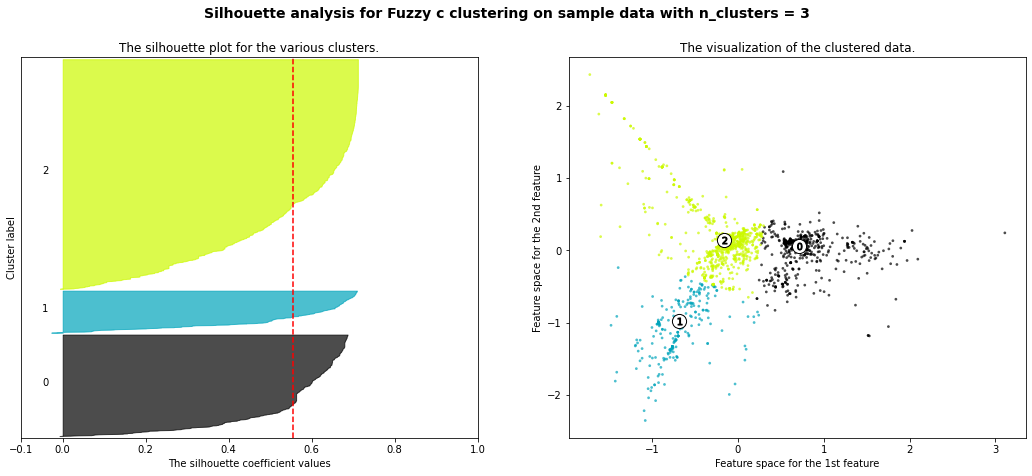

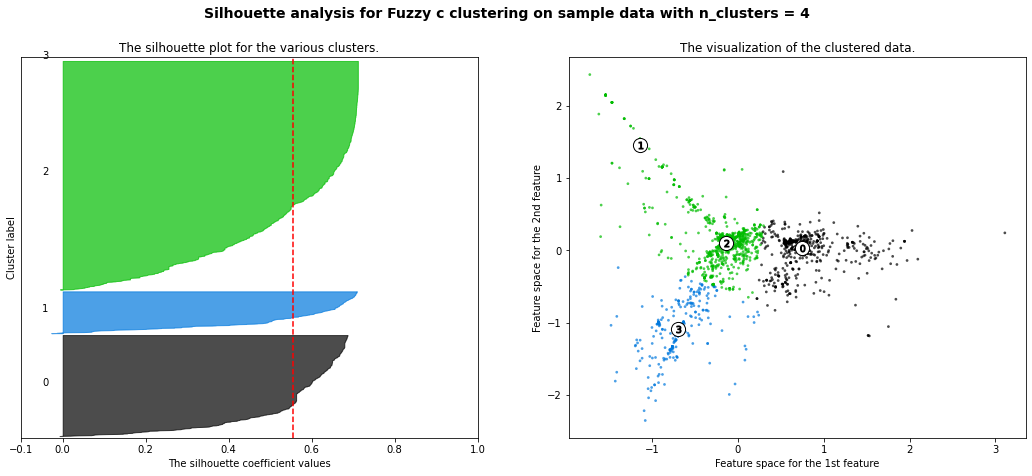

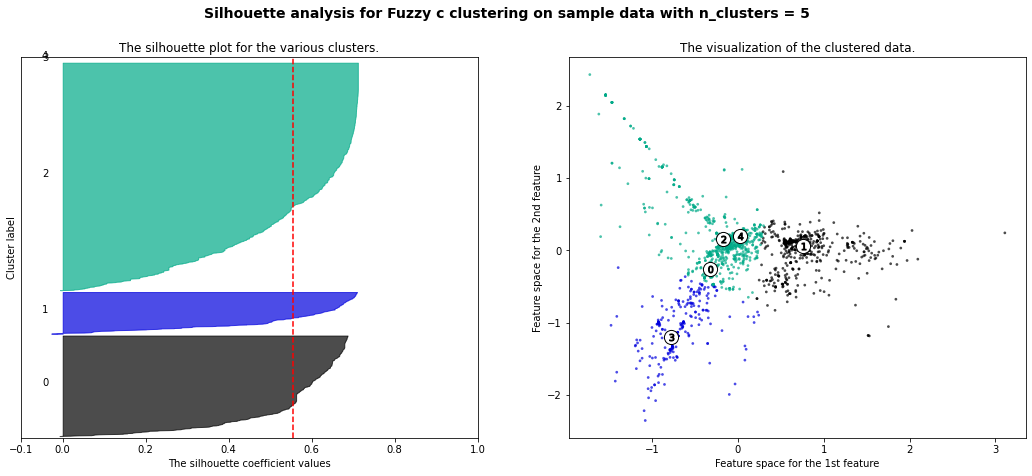

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# *********************
X = principalComponents
# *********************

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = FCM(n_clusters=n_clusters)
    clusterer.fit(X)
    cluster_labels = fcm.u.argmax(axis=1)
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    clusterer.centers
    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    centers = clusterer.centers
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Fuzzy c clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [ ]:
# len(X)

In [ ]:
# len(fcm.u.argmax(axis=1))

In [ ]:
labelsFuz = list(fcm.u.argmax(axis=1))
df["labelsFuzFinal"] = labelsFuz
dfFuzfinal = df[['Text','labelsFuzFinal']]
dfFuzfinal

,Text,labelsFuzFinal
0,masyarakat mudah pelayanan mata fasilitas kese...,1
1,bpjs kesehatan ketenagakerjaan manfaatnya bagus,1
2,alhamdulillah bpjs kesehatan bener membantu wa...,1
3,bpjs iurannya dibandingkan premi asuransi kese...,1
4,naiknya iuran org berpenghasilan minim bpjs su...,0
...,...,...
695,kesehatan masak beli rokok bpjs kesehatan sebu...,1
696,baca dimana bpjs kesehatan klas tdk dinaikan j...,1
697,diwakili enak rakyat kebagian mewakili kesusah...,0
698,bpjs kesehatan pribadi memikirkan rakyat rakya...,0


In [ ]:
dfFuzfinal.labelsFuzFinal.value_counts()

1    1489
0     628
Name: labelsFuzFinal, dtype: int64